In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd

#Origin of Replication

With gene replication being one of the most important biological processes in a cell, its no surprise finding the origin of replication (oriC) is pursued endeavor for bioinformaticians and computational biologists. The task varies from genome to genome, and string to string with context-specific details. However, there are some universal traits that we can turn into a toolbox of tricks with programming that will assist life scientists with understanding any strand out there.

It should be noted that many of these algorithms could be streamlined with the use of numeric processing libraries like numpy/tensorflow and data manipulation ones like pandas. However to focus on teaching basic python fundamentals and not overwhelm you, we'll focus on purely what Python can offer.

In [0]:
sample_genome = 'ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTC'
#Arbitrary string for us to test our functions/pipeline on.

## Frequency of Patterns Method

In [0]:
def pattern_frequency(pattern, genwindow):
  '''
  Input: pattern = Pattern of nucleotides you wish to search the genome window for
         genwindow = Section of sample genome (or entire genome)

  Output: Number of times pattern shows up in the genome window
  
  Slides through the genome window and looks for the pattern (can be anything length from 'G' or 'ACT') and returns how often it occurs.
  '''
  count = 0
  for i in range(len(genwindow) - len(pattern)+1):
    if genwindow[i:i+len(pattern)] == pattern:
      count += 1  
  return count



def all_pattern_frequency_compiler(k, sample_genome):
  '''
  Input: sample_genome = genome string to be scanned through
         k = length of k-mer to be found
         
  Output: Dictionary of every k-mer and its frequency
  
  This function uses a 'sliding window' with length 'k' to scan through the sample genome and create a dictionary with EVERY k pattern as a key and its frequency as its dict entry.
  
  '''
  frequency = {}
  for i in range(len(sample_genome)-k+1):
    pattern = sample_genome[i:i+k]
    frequency[pattern] = 0
    for i in range(len(sample_genome) - len(pattern)+1):
      if sample_genome[i:i+len(pattern)] == pattern:
        frequency[pattern] = frequency[pattern] + 1
  return frequency

      
  
def highest_frequency_info(frequency):
  
  '''
  Input: dictionary from all_symbol_frequency_compiler function
  
  Output: Returns list of patterns with the highest frequency
  
  Continuing from the previous function, this returns the patterns with the highest frequency so user knows which ones to focus on.
  '''
  
  m = max(frequency.values())
  highest_patterns = []
  for key in frequency:
    if frequency[key] == m:
      highest_patterns.append(key)
  return highest_patterns
    
  
  
def complementary_string(string):
  '''
  Input: Any string of nucleotides
  
  Output: Returns complementary to inputted string
  
  General useful tool in research for a quick transformation on a string.
  '''
  
  reversed = string[::-1]
  dna_dict_map = {"A" : "T" , "T":"A", "G":"C", "C":"G" }
  comp = ''
  for i in reversed:
    comp = comp + dna_dict_map[i]
  return comp
  

  
def pattern_position_finder(patterns, sample_genome):
  '''
  Input: A list of patterns. Even if its a single pattern, make sure its in a list
  
  Output: Dictionary with each pattern as a key and its positions at which it appears as its entry
  
  Helpful to to locates 'clumps' of patterns to check how close they are to each other and check for an OriC.
  '''
  position_dict = {}
  for string in patterns:
    positions = [i for i in range(len(sample_genome)-len(string)+1) if sample_genome[i:i+len(string)] == string]
    position_dict[string] = positions
  return position_dict


def positions_grapher(sample_genome):
  '''
  Input = sample_genome
  
  Output = Graph where all the occurrences of the most frequent Kmer show up on the genome as values of 1 (a binary step function)'''
  base = [0] * len(sample_genome)
  sample_dict = pattern_position_finder(highest_frequency_info(all_pattern_frequency_compiler(5, sample_genome)), sample_genome)
  list_of_high_freq = highest_frequency_info(all_pattern_frequency_compiler(5, sample_genome))
  for i in sample_dict[list_of_high_freq[0]]:
    base[i] = 1
  x = np.arange(0, len(sample_genome), 1)
  y = base

  fig, ax = plt.subplots()
  ax.scatter(x, y)

  ax.set(xlabel='Genome Length', ylabel= list_of_high_freq[0],
       title= list_of_high_freq[0]+ " " + 'Positions'+ " " +'vs Genome Length')
  ax.grid()
  plt.show()

11
4
{'ATCAA': 6, 'TCAAT': 2, 'CAATG': 2, 'AATGA': 4, 'ATGAT': 7, 'TGATC': 8, 'GATCA': 8, 'TCAAC': 1, 'CAACG': 1, 'AACGT': 1, 'ACGTA': 1, 'CGTAA': 2, 'GTAAG': 1, 'TAAGC': 2, 'AAGCT': 2, 'AGCTT': 1, 'GCTTC': 3, 'CTTCT': 1, 'TTCTA': 1, 'TCTAA': 1, 'CTAAG': 1, 'AAGCA': 2, 'AGCAT': 2, 'GCATG': 2, 'CATGA': 4, 'TCAAG': 4, 'CAAGG': 2, 'AAGGT': 2, 'AGGTG': 2, 'GGTGC': 1, 'GTGCT': 2, 'TGCTC': 2, 'GCTCA': 1, 'CTCAC': 1, 'TCACA': 1, 'CACAC': 1, 'ACACA': 1, 'CACAG': 1, 'ACAGT': 1, 'CAGTT': 1, 'AGTTT': 1, 'GTTTA': 2, 'TTTAT': 2, 'TTATC': 2, 'TATCC': 1, 'ATCCA': 1, 'TCCAC': 1, 'CCACA': 1, 'CACAA': 1, 'ACAAC': 1, 'CAACC': 1, 'AACCT': 1, 'ACCTG': 1, 'CCTGA': 2, 'CTGAG': 2, 'TGAGT': 1, 'GAGTG': 1, 'AGTGG': 1, 'GTGGA': 1, 'TGGAT': 1, 'GGATG': 2, 'GATGA': 4, 'ATGAC': 2, 'TGACA': 3, 'GACAT': 3, 'ACATC': 3, 'CATCA': 2, 'CAAGA': 2, 'AAGAT': 3, 'AGATA': 1, 'GATAG': 2, 'ATAGG': 1, 'TAGGT': 1, 'AGGTC': 1, 'GGTCG': 1, 'GTCGT': 1, 'TCGTT': 2, 'CGTTG': 1, 'GTTGT': 2, 'TTGTA': 1, 'TGTAT': 1, 'GTATC': 1, 'TATCT': 2

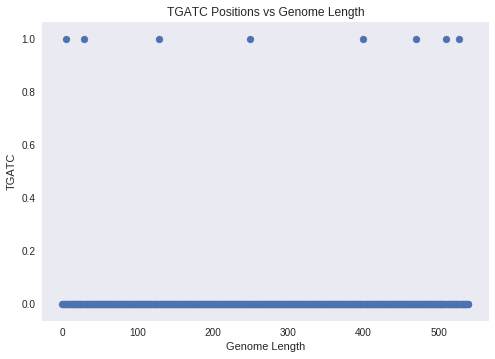

In [0]:
#As an example to showcase our code, I've narrowed down the most frequent 5-mer to 'TGATC'and 'GATCA' and shown their positions in the entire genome.
#The graph shows exactly where on the genome our frequent kmer appears so we can observe the clusters. 
print(pattern_frequency('ATT', sample_genome))
print(pattern_frequency('CGC', sample_genome))
print(all_pattern_frequency_compiler(5, sample_genome))
print(highest_frequency_info(all_pattern_frequency_compiler(5, sample_genome)))
print(pattern_position_finder(highest_frequency_info(all_pattern_frequency_compiler(5, sample_genome)), sample_genome))
positions_grapher(sample_genome)


For a known Ori, it is helpful to understand its layout by finding frequencies of certain strings/patterns of nucleotides. DNA-A is a protein that intiates replication by binding to a string in the Ori. Certain strings of nucleotides allow proteins to bind to DNA, if these strings are more frequent in a small region, binding is more likely to be successful. This is one tool to discover more about a bacterial cell's replication behaviour and can even help narrow down a 500 to 600 nucleotide window as a possible candidate for OriC.

**Issues/Evaluation:** Frequent kmers can be a statistical coincidence, there can be several frequent kmers or the oriC might just not be there.

##Leading & Lagging Strands Method

In [0]:
def nuc_array(sample_genome, nucleotide):
  
  '''
  Input: Nucleotide is the 'letter' we want to scan for and we will iterate through the Genome
  
  Output: Returns a nucleotide array, detailing how many times a nucleotide appears in our gen//2 sized window at each position
  '''
  nucleo_dict = {}
  genlen = len(sample_genome)
  extended_genome = sample_genome+sample_genome[0:genlen//2]
  nucleo_dict[0] = pattern_frequency(nucleotide, sample_genome[0:genlen//2])
  for i in range(1, genlen):
      nucleo_dict[i] = nucleo_dict[i-1]
      if extended_genome[i-1] == nucleotide:
          nucleo_dict[i] = nucleo_dict[i]-1
      if extended_genome[i+(genlen//2)-1] == nucleotide:
          nucleo_dict[i] = nucleo_dict[i]+1
  return nucleo_dict


  
def GC_Difference(sample_genome):
  '''
  Input: sample_genome
  Output: An array that shows the difference between G occurrences and C occurrences at a particular position in the genome
  '''
  count = 0
  array = [0]
  for n in sample_genome:
      if (n == 'C'):
          count -= 1
      elif (n == 'G'):
          count += 1
      array.append(count)
  return array

  
  
def Lowest_GC_Difference_Points(sample_genome):
  
  '''
  Input: sample_genome
  
  Output: Positions in the genome with the G-C value attains a minimum
  
  Useful if you decide not to graph your array from the previous section.
  '''
  positions = [] 
  array  = GC_Difference(sample_genome)
  m = min(array)
  for i in range(len(array)):
      if array[i] == m:
          positions.append(i)

  return positions


def GC_grapher(sample_genome):
  '''
  
  '''
  t = np.arange(0, len(GC_Difference(sample_genome)), 1)
  s = GC_Difference(sample_genome)

  fig, ax = plt.subplots()
  ax.plot(t, s)

  ax.set(xlabel='Genome Length', ylabel='GC Difference',
       title='GC Diff vs Genome Length')
  ax.grid()
  plt.show()

  
def HammingDistance(p, q):
  '''
  Simple formula to calculate how many mismatches there ar between two strings (p and q)
  '''
  count = 0
  for i in range(len(p)):
      if p[i] != q[i]:
          count += 1
  return count
                  
                  
def positions_freq_of_mismatches(max_num_mismatches, pattern, sample_genome):
                  
  '''
  Input: max_num_mismatches (int) = The amount of mismatches a sequence can vary at most that you want to record
         pattern = The original sequence you are recording mismatches from
         sample_genome = Genome

  Output: positions = Returns he positions of the mismatched sequences with X or less mismatches (X being max_num_mismatches)
                      Returns how many times a sequence with at most X or less mismatches from the original appears in the genome.
  '''
                  
  positions = []
  for i in range(len(sample_genome) - len(pattern) + 1):
    if HammingDistance(sample_genome[i:i+len(pattern)], pattern) <= max_num_mismatches:
      positions.append(i)
  return positions, len(positions)

{0: 72, 1: 71, 2: 71, 3: 72, 4: 71, 5: 70, 6: 70, 7: 70, 8: 69, 9: 69, 10: 69, 11: 68, 12: 67, 13: 67, 14: 68, 15: 68, 16: 67, 17: 66, 18: 67, 19: 67, 20: 68, 21: 68, 22: 68, 23: 68, 24: 67, 25: 66, 26: 66, 27: 67, 28: 66, 29: 66, 30: 67, 31: 66, 32: 67, 33: 67, 34: 67, 35: 66, 36: 66, 37: 66, 38: 66, 39: 66, 40: 66, 41: 66, 42: 66, 43: 65, 44: 66, 45: 65, 46: 65, 47: 65, 48: 65, 49: 65, 50: 65, 51: 66, 52: 65, 53: 65, 54: 66, 55: 66, 56: 65, 57: 65, 58: 65, 59: 65, 60: 66, 61: 66, 62: 66, 63: 66, 64: 65, 65: 65, 66: 66, 67: 66, 68: 66, 69: 65, 70: 65, 71: 65, 72: 64, 73: 64, 74: 63, 75: 63, 76: 64, 77: 63, 78: 63, 79: 63, 80: 62, 81: 62, 82: 62, 83: 62, 84: 62, 85: 62, 86: 62, 87: 63, 88: 64, 89: 65, 90: 65, 91: 65, 92: 64, 93: 65, 94: 65, 95: 66, 96: 67, 97: 67, 98: 67, 99: 68, 100: 69, 101: 69, 102: 69, 103: 69, 104: 70, 105: 70, 106: 71, 107: 71, 108: 70, 109: 70, 110: 70, 111: 70, 112: 70, 113: 70, 114: 69, 115: 69, 116: 69, 117: 69, 118: 69, 119: 69, 120: 69, 121: 69, 122: 69, 12

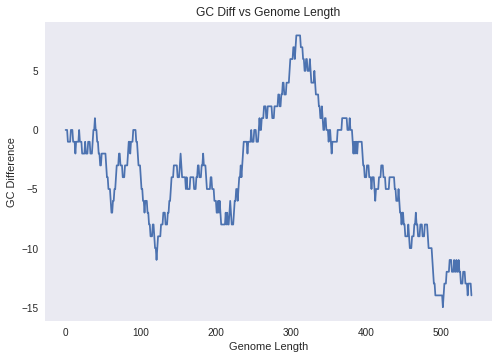

In [0]:
print((nuc_array(sample_genome, 'A')))
print(GC_Difference(sample_genome))
print(Lowest_GC_Difference_Points(sample_genome))
print(positions_freq_of_mismatches(3, "ATAGGCTA", sample_genome))
GC_grapher(sample_genome)

During replication, DNA polymerase moves along the template (original) strand from 3' to 5' and synthesizes the complementary strand from 5' to 3'. This is our well-known leading strand. We also know that the lagging strand takes longer due to needing to wait for the fork in the replication to open up to make okazaki fragments. We can use this knowledge to our advantage to find the OriC! Since the lagging strand spends more of its life single stranded than the leading strand, it is more unstable and much more prone to mutation. Due to this,  deamination occurs more frequently, a process by which cytosine mutates into thymine. Thus there is a significant decrease in guanine (cytosines pair) as well.

Knowing C is less common in the lagging strand and more common in the leading one now, we can split our genome in two and slide a window of length genome//2 and count up the occurrences of A, C, G, T (seen in our array function).

Therefore by going through the genome and keeping a tally of the difference between G-C occurences at each point we can see any difference fluctuations. The moment we go from a positive increasing difference to decreasing we know we've passed the OriC!
However, even finding the Kmer at the right position leaves us with a problem of mismatching Kmers. There could be a nucleotide thats different that the DNA-A can still bind to and doesn't necessarily need to be the perfect sequences. positions_freq_of_mismatches lets us see all the positions at which sequences of an original appear with at most X mismatches, and the frequency of mismatches.


**Issues/Evaluation:** The possibility that frequent kmer clusters correspond to something other than replication remains so the prediction is not 100% perfect. However, even providing a canadidate for biologists to examine is useful.